<a href="https://colab.research.google.com/github/jcamilo2025/Bootcamp/blob/RamaBootCamp/Emisi%C3%B3nF%C3%B3sil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
drive.mount('/gdrive')

Mounted at /gdrive


In [7]:
df = pd.read_csv("/gdrive/MyDrive/BootCamp/emisionfosil_trabajar_2.csv", sep = ";")

In [8]:
print(df.columns.tolist())  # Muestra todas las columnas del DataFrame

['# IdEmision', ' NombrePais', ' Anio', ' TipoIndustria', ' Valor']


  TipoIndustria       Valor  Porcentaje
0        cement   202200790    5.411864
1          coal   792669411   21.215640
2       flaring    71644500    1.917551
3           gas   710304965   19.011172
4           oil  1959430692   52.443774


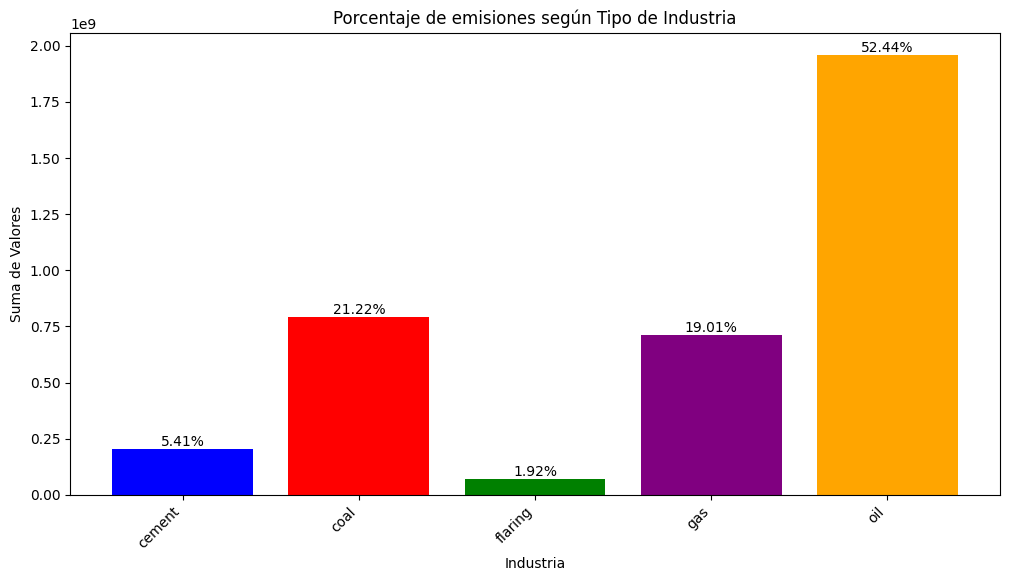

In [9]:
# Eliminar espacios en los nombres de las columnas
df.columns = df.columns.str.strip()

# Limpiar la columna 'TipoIndustria'
df['TipoIndustria'] = df['TipoIndustria'].str.split('from').str[-1].str.strip()

# Reemplazo de valores en la columna 'Valor'
valores_a_reemplazar = {
    51606800: 516068, 104304000: 1043040, 12733700: 127337, 20594400: 2059440,
    83091200: 8309120, 103700000: 1037000, 100020000: 1000200, 104502000: 1045020,
    100345000: 1003450, 20225300: 2022530, 102592000: 1025920, 102958000: 1029580,
    82953000: 8295300, 80534700: 8053470
}
df["Valor"] = df["Valor"].replace(valores_a_reemplazar)

# Agrupar por TipoIndustria y sumar la columna 'Valor'
df_sum = df.groupby('TipoIndustria', as_index=False)['Valor'].sum()

# Calcular el porcentaje de cada industria sobre el total
df_sum["Porcentaje"] = (df_sum["Valor"] / df_sum["Valor"].sum()) * 100

# Verificar valores antes de graficar
print(df_sum)

# Crear la gráfica con Matplotlib
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(df_sum['TipoIndustria'], df_sum['Valor'], color=['blue', 'red', 'green', 'purple', 'orange'])

# Agregar etiquetas con porcentaje sobre las barras
for bar, porcentaje in zip(bars, df_sum["Porcentaje"]):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{porcentaje:.2f}%',
            ha='center', va='bottom', fontsize=10, color='black')

# Configurar etiquetas y título
ax.set_xlabel("Industria")
ax.set_ylabel("Suma de Valores")
ax.set_title("Porcentaje de emisiones según Tipo de Industria")
ax.set_xticks(range(len(df_sum["TipoIndustria"])))
ax.set_xticklabels(df_sum['TipoIndustria'], rotation=45, ha='right')

# Guardar la imagen para subirla a GitHub
plt.savefig("grafico_industria.png", bbox_inches="tight")

# Mostrar la gráfica
plt.show()

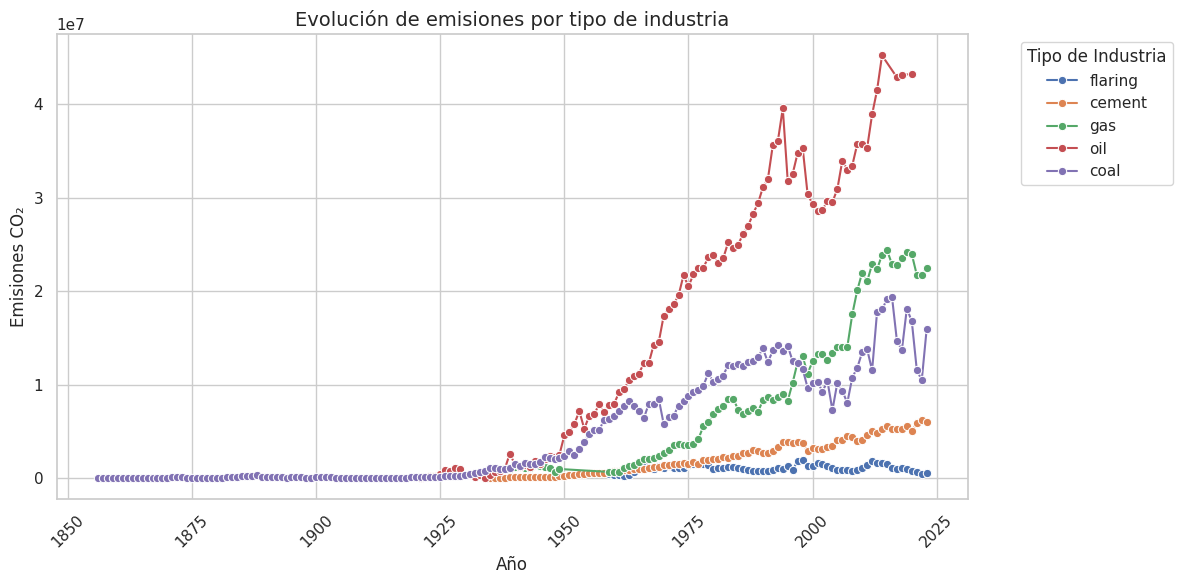

In [10]:
#Creación de Gráfico por Tipo de Industria a través del tiempo
# Convertir columnas a numérico
df['Anio'] = pd.to_numeric(df['Anio'], errors='coerce')
df['Valor'] = pd.to_numeric(df['Valor'], errors='coerce')

# Filtrar valores atípicos
df = df[df['Valor'] > 0]  # Eliminar valores de 0 o negativos
df = df[df['Valor'] < df['Valor'].quantile(0.99)]  # Filtrar outliers extremos

#reemplazo outliers identificados con ceros adicionales
df['Valor'] = df['Valor'].replace(51606800, 516068)
df['Valor'] = df['Valor'].replace(104304000, 1043040)
df["Valor"] = df["Valor"].replace(12733700, 127337)
df["Valor"] = df["Valor"].replace(20594400, 2059440)
df["Valor"] = df["Valor"].replace(83091200, 8309120)
df["Valor"] = df["Valor"].replace(103700000, 1037000)
df["Valor"] = df["Valor"].replace(100020000, 1000200)
df["Valor"] = df["Valor"].replace(104502000, 1045020)
df["Valor"] = df["Valor"].replace(100345000, 1003450)
df["Valor"] = df["Valor"].replace(20225300, 2022530)
df["Valor"] = df["Valor"].replace(102592000, 1025920)
df["Valor"] = df["Valor"].replace(102592000, 1025920)
df["Valor"] = df["Valor"].replace(102958000, 1029580)
df["Valor"] = df["Valor"].replace(82953000, 8295300)
df["Valor"] = df["Valor"].replace(80534700, 8053470)


# Configurar Seaborn para mejor estilo
sns.set_theme(style="whitegrid")

# Crear la figura
fig, ax = plt.subplots(figsize=(12, 6))

# Graficar cada industria
sns.lineplot(data=df, x="Anio", y="Valor", hue="TipoIndustria", marker="o", ax=ax)

# Mejorar etiquetas y títulos
ax.set_xlabel("Año", fontsize=12)
ax.set_ylabel("Emisiones CO₂", fontsize=12)
ax.set_title("Evolución de emisiones por tipo de industria", fontsize=14)
ax.legend(title="Tipo de Industria", bbox_to_anchor=(1.05, 1), loc="upper left")

# Ajustar diseño
plt.xticks(rotation=45)  # Rotar años para mejor lectura
plt.tight_layout()  # Ajustar el gráfico

fig.show()


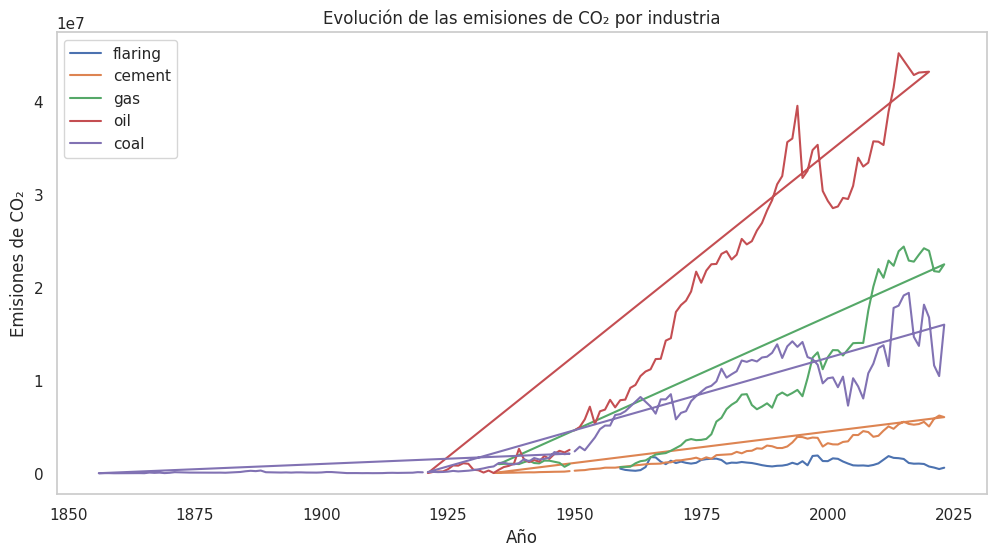

In [11]:
# Convertir la columna 'Anio' a tipo numérico
df['Anio'] = pd.to_numeric(df['Anio'], errors='coerce')

# Gráfico de líneas: Evolución de las emisiones por tipo de industria
plt.figure(figsize=(12, 6))
for tipo in df['TipoIndustria'].unique():
    subset = df[df['TipoIndustria'] == tipo]
    plt.plot(subset['Anio'], subset['Valor'], label=tipo)
plt.xlabel('Año')
plt.ylabel('Emisiones de CO₂')
plt.title('Evolución de las emisiones de CO₂ por industria')
plt.legend()
plt.grid()
plt.show()

In [12]:
# Agrupar por año y sumar emisiones
emisiones_por_año = df.groupby('Anio')['Valor'].sum()

# Encontrar el año con mayor emisión
año_max = emisiones_por_año.idxmax()
emisiones_max = emisiones_por_año.max()

print(f"Año con más emisiones: {año_max} con {emisiones_max:.2f} toneladas de CO₂")

Año con más emisiones: 2014 con 94077880.00 toneladas de CO₂


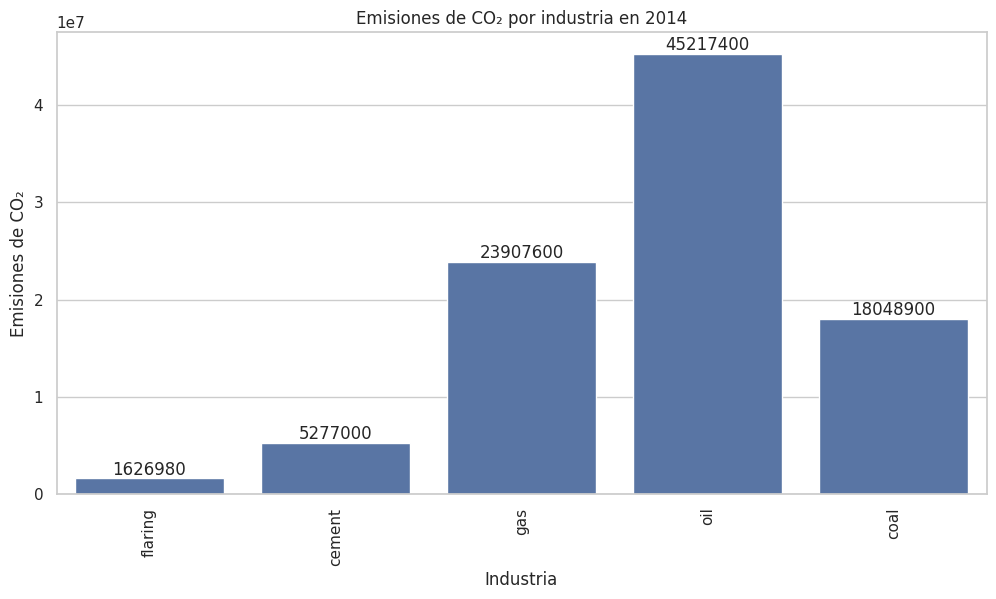

In [13]:
# Gráfico de barras: Emisiones por industria en un años específicos, esto si queremos ver un año puntual y la distribución
anio_filtro = 2014  # Cambiamos acá el año según sea necesario
df_anio = df[df['Anio'] == anio_filtro]
plt.figure(figsize=(12, 6))
sns.barplot(x='TipoIndustria', y='Valor', data=df_anio)
plt.xticks(rotation=90)
plt.xlabel('Industria')
plt.ylabel('Emisiones de CO₂')
plt.title(f'Emisiones de CO₂ por industria en {anio_filtro}')
for i, v in enumerate(df_anio['Valor']):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

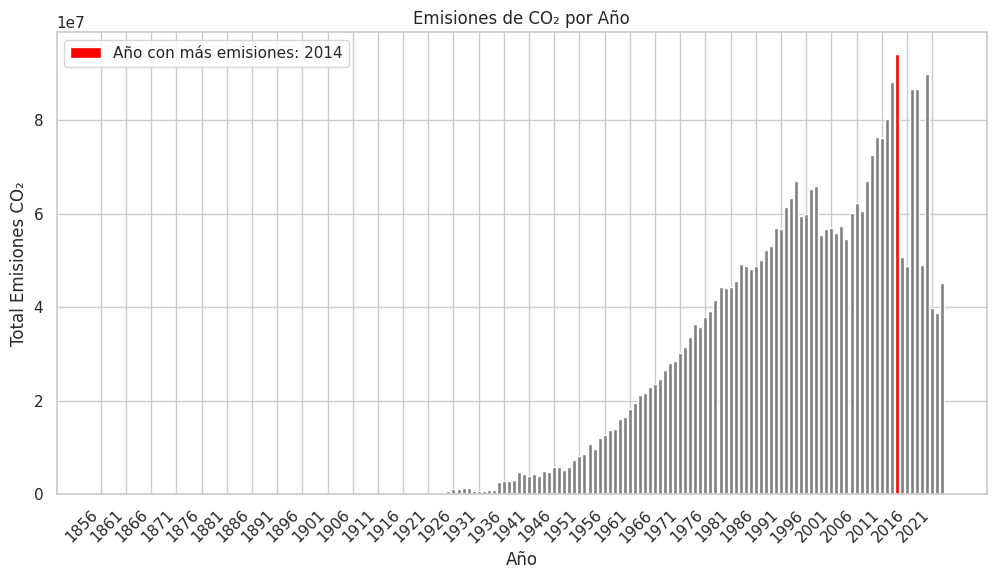

In [14]:
#en está grafica podemos visualizar año a año el comportamioento de la cantidad de emisiones resaltando el año donde se presenta el pico
plt.figure(figsize=(12, 6))
plt.bar(emisiones_por_año.index, emisiones_por_año.values, color='gray')

# Resaltar el año con más emisiones
plt.bar(año_max, emisiones_max, color='red', label=f"Año con más emisiones: {año_max}")

plt.xlabel("Año")
plt.ylabel("Total Emisiones CO₂")
plt.title("Emisiones de CO₂ por Año")
plt.legend()

# Rotar etiquetas y reducir cantidad mostrada de 5 en 5 años
plt.xticks(emisiones_por_año.index[::5], rotation=45, ha='right')

plt.show()

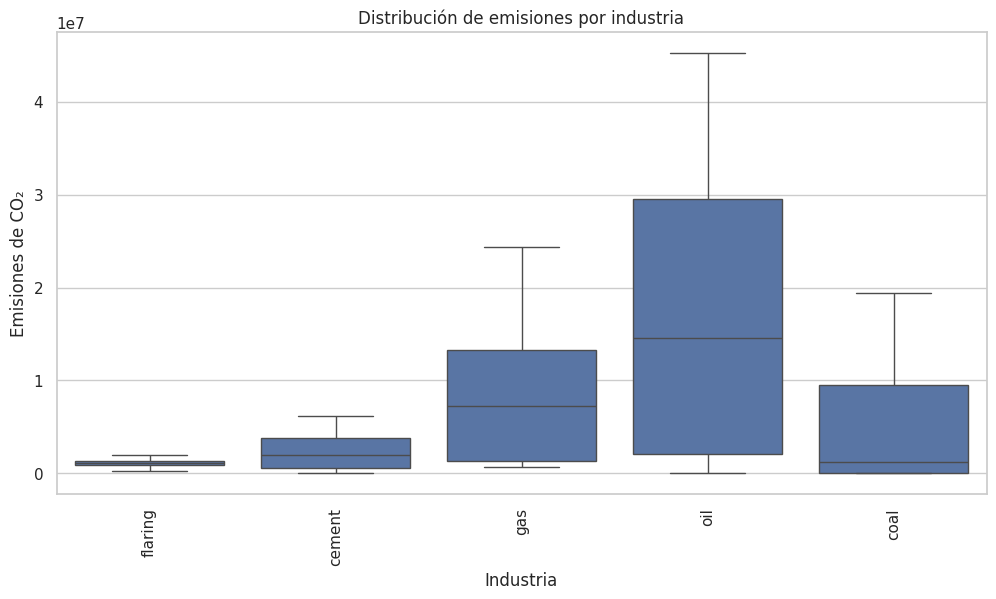

In [15]:
# Boxplot: Para identificar valores atípicos, en este caso Gasolina y Gas tienen las emisiones que más varían lo cual nos dice que hay gran variabilidad
# en los procesos de estas industrias, flaring o quema de gas tiene las emisiones más bajas, mientras coal y cement tienen un comportamiento de emisiones altas
# pero sin tanta dispersión como el oil
plt.figure(figsize=(12, 6))
sns.boxplot(x='TipoIndustria', y='Valor', data=df)
plt.xticks(rotation=90)
plt.xlabel('Industria')
plt.ylabel('Emisiones de CO₂')
plt.title('Distribución de emisiones por industria')
plt.show()

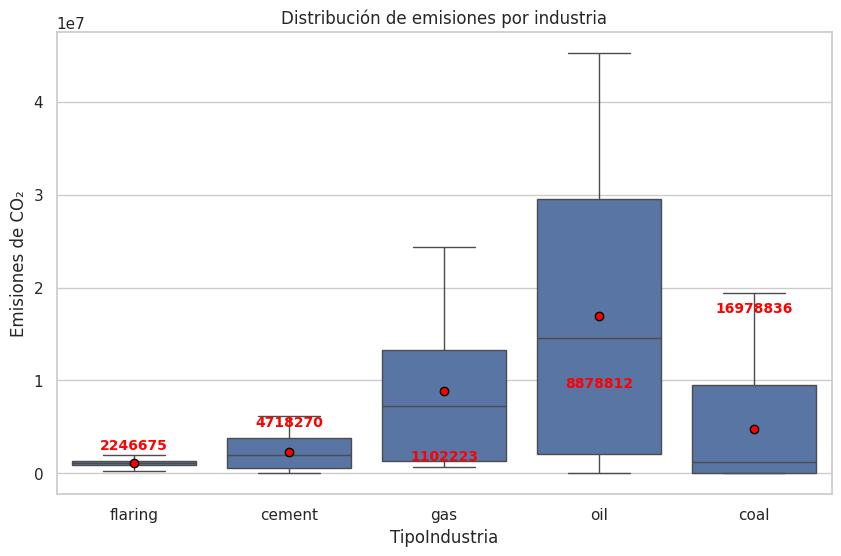

In [16]:
#variabilidad de acuerdo a las medias
#en este caso observamos el carbón tiene la media mas alta en emisiones respecto al petroleo
# y se puede dar ya que para producir una tonelada de energía: esto es 1,5 veces más que el gas; 1,3 veces más que el petróleo

plt.figure(figsize=(10,6))
ax = sns.boxplot(x='TipoIndustria', y='Valor', data=df, showmeans=True, meanprops={"marker":"o", "markerfacecolor":"red", "markeredgecolor":"black"})

# Agregar etiquetas a la media
medias = df.groupby('TipoIndustria')['Valor'].mean()
for i, mean in enumerate(medias):
    ax.text(i, mean, f'{mean:.0f}', ha='center', va='bottom', color='red', fontsize=10, fontweight='bold')

plt.title('Distribución de emisiones por industria')
plt.xlabel('TipoIndustria')
plt.ylabel('Emisiones de CO₂')
plt.show()

In [17]:
df.columns = df.columns.str.strip()  # Elimina espacios en los nombres de las columnas

# Limpiar la columna 'TipoIndustria' dejando solo lo que está después de "from"
df['TipoIndustria'] = df['TipoIndustria'].str.split('from').str[-1].str.strip()

# Reemplazo de valores en la columna 'Valor'
valores_a_reemplazar = {
    51606800: 516068, 104304000: 1043040, 12733700: 127337, 20594400: 2059440,
    83091200: 8309120, 103700000: 1037000, 100020000: 1000200, 104502000: 1045020,
    100345000: 1003450, 20225300: 2022530, 102592000: 1025920, 102958000: 1029580,
    82953000: 8295300, 80534700: 8053470
}
df["Valor"] = df["Valor"].replace(valores_a_reemplazar)

# Agrupar por TipoIndustria y sumar la columna 'Valor'
df_sum = df.groupby('TipoIndustria', as_index=False)['Valor'].sum()

# Calcular el porcentaje de cada industria sobre el total
df_sum["Porcentaje"] = (df_sum["Valor"] / df_sum["Valor"].sum()) * 100


# Crear el gráfico de barras con etiquetas de porcentaje
fig = px.bar(df_sum,
             x='TipoIndustria',
             y='Valor',
             title="Porcentaje de emisiones según Tipo de Industria",
             labels={'Valor': 'Suma de Valores', 'TipoIndustria': 'Industria'},
             color='TipoIndustria',
             text=df_sum["Porcentaje"].map(lambda x: f"{x:.2f}%"))  # Formato porcentaje

fig.update_traces(textposition='outside')  # Posicionar etiquetas fuera de las barras

fig.show()

In [22]:
dfpercapita = pd.read_csv("/gdrive/MyDrive/BootCamp/co-emissions-per-capita.csv", sep = ",")

In [23]:
dfpercapita.head()

,Entity,Code,Year,Annual CO₂ emissions (per capita)
0,Colombia,COL,1856,0.004007
1,Colombia,COL,1857,0.007306
2,Colombia,COL,1858,0.007823
3,Colombia,COL,1859,0.002023
4,Colombia,COL,1860,0.003530


In [28]:
dfpercapita = dfpercapita.rename(columns={'Annual CO₂ emissions (per capita)':'CO2emissions'})

In [29]:
dfpercapita.head()

,Entity,Code,Year,CO2emissions
0,Colombia,COL,1856,0.004007
1,Colombia,COL,1857,0.007306
2,Colombia,COL,1858,0.007823
3,Colombia,COL,1859,0.002023
4,Colombia,COL,1860,0.003530


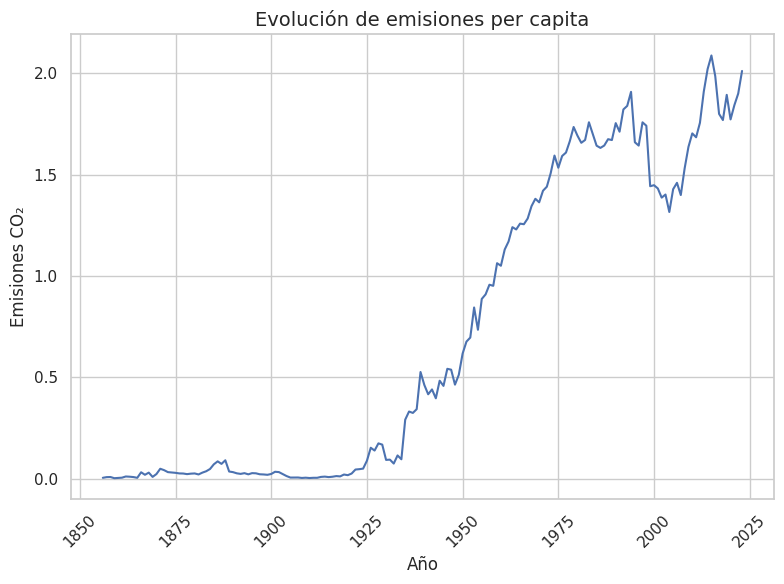

In [33]:
#graficamos emisiones por año a través del tiempo

sns.set_theme(style="whitegrid")

# Crear la figura
fig, ax = plt.subplots(figsize=(8, 6))

# Graficar cada industria
sns.lineplot(data=dfpercapita, x="Year", y="CO2emissions")

# Mejorar etiquetas y títulos
ax.set_xlabel("Año", fontsize=12)
ax.set_ylabel("Emisiones CO₂", fontsize=12)
ax.set_title("Evolución de emisiones per capita", fontsize=14)
#ax.legend(title="Tipo de Industria", bbox_to_anchor=(1.05, 1), loc="upper left")

# Ajustar diseño
plt.xticks(rotation=45)  # Rotar años para mejor lectura
plt.tight_layout()  # Ajustar el gráfico

fig.show()

In [39]:
# Crear el gráfico de barras con etiquetas de porcentaje

fig = px.line(dfpercapita,
             x='Year',
             y='CO2emissions',
             title="Emisiones de CO₂ por Año",
             labels={'CO2emissions': 'Emisiones de CO₂', 'Year': 'Año'})  # Corrección de etiquetas

fig.update_traces(text=None)  # Quitar etiquetas de datos sobre la línea

fig.show()